## The Data

At this link, you will find a dataset containing information about heart disease patients: https://www.dropbox.com/scl/fi/0vrpdnq5asmeulc4gd50y/ha_1.csv?rlkey=ciisalceotl77ffqhqe3kujzv&dl=1

A description of the original dataset can be found here: https://archive.ics.uci.edu/dataset/45/heart+disease (However, this dataset has been cleaned and reduced, and the people have been given fictious names.)

## 1. Logistic Regression

Fit a Logistic Regression using only `age` and `chol` (cholesterol) as predictors.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

How high for the doctors to estimate a 90% chance that heart disease is present?

In [1]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder

heart_disease = pd.read_csv('https://www.dropbox.com/scl/fi/0vrpdnq5asmeulc4gd50y/ha_1.csv?rlkey=ciisalceotl77ffqhqe3kujzv&dl=1')
heart_disease.head()

X_train = heart_disease[['age', 'chol']]
y_train = heart_disease['diagnosis']

In [2]:
heart_disease.head()

,Name,age,sex,cp,trtbps,chol,restecg,thalach,diagnosis
0,Magnolia Cassin,60,1,1,117,230,1,160,No Disease
1,Dr. Cathern Heathcote,60,0,3,102,318,1,160,Disease
2,Miles Wolf,62,0,3,130,263,1,97,No Disease
3,Mikaila Block,43,1,1,115,303,1,181,Disease
4,Mrs. Jacquline Marquardt,66,1,1,120,302,0,151,Disease


In [3]:
heart_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Name       204 non-null    object
 1   age        204 non-null    int64 
 2   sex        204 non-null    int64 
 3   cp         204 non-null    int64 
 4   trtbps     204 non-null    int64 
 5   chol       204 non-null    int64 
 6   restecg    204 non-null    int64 
 7   thalach    204 non-null    int64 
 8   diagnosis  204 non-null    object
dtypes: int64(7), object(2)
memory usage: 14.5+ KB


In [4]:
heart_disease.describe()

,age,sex,cp,trtbps,chol,restecg,thalach
count,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000
mean,53.813725,0.666667,2.049020,131.245098,248.377451,0.558824,149.147059
std,9.354781,0.472564,1.030352,18.352024,53.176624,0.526603,23.990925
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,71.000000
25%,46.000000,0.000000,1.000000,120.000000,212.750000,0.000000,132.000000
50%,54.000000,1.000000,2.000000,129.500000,241.000000,1.000000,153.500000
75%,61.000000,1.000000,3.000000,140.000000,276.250000,1.000000,166.250000
max,77.000000,1.000000,4.000000,200.000000,564.000000,2.000000,202.000000


In [5]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression())
])

pipeline.fit(X_train, y_train)


Pipeline(steps=[('scaler', StandardScaler()), ('model', LogisticRegression())])

In [6]:
import numpy as np

log_reg = pipeline.named_steps['model']
scaler = pipeline.named_steps['scaler']

b0 = log_reg.intercept_[0]
b1, b2 = log_reg.coef_[0]

mean_age, mean_chol = scaler.mean_
std_age, std_chol = np.sqrt(scaler.var_)


In [7]:
b0

np.float64(-0.27025982200075166)

In [8]:
b1

np.float64(0.42746115369956383)

In [9]:
b2

np.float64(0.09597542617159378)

In [10]:
z_age = (55 - mean_age) / std_age
z_age

np.float64(0.1271213906031003)

In [11]:
logit_50 = np.log(0.5 / (1 - 0.5))
logit_50

np.float64(0.0)

In [12]:
logit_90 = np.log(0.9 / (1 - 0.9))
logit_90

np.float64(2.1972245773362196)

In [13]:
z_chol_50 = (logit_50 - b0 - b1*z_age) / b2
z_chol_50


np.float64(2.2497463603611934)

In [15]:
z_chol_90 = (logit_90 - b0 - b1*z_age) / b2
z_chol_90

np.float64(25.143362622171978)

In [20]:
chol_90 = z_chol_50 * std_chol + mean_chol

In [21]:
chol_90

np.float64(367.71778753271246)

## 2. Linear Discriminant Analysis

Fit an LDA model using only `age` and `chol` (cholesterol)  as predictors.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

In [22]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

X = heart_disease[['age', 'chol']]
y = heart_disease['diagnosis']

lda = LinearDiscriminantAnalysis()
lda.fit(X, y)


LinearDiscriminantAnalysis()

In [23]:
b0 = lda.intercept_[0]
b1, b2 = lda.coef_[0]

chol_threshold = -(b0 + b1 * 55) / b2
chol_threshold


np.float64(368.235357529938)

## 3. Support Vector Classifier

Fit an SVC model using only `age` and `chol` as predictors.  Don't forget to tune the regularization parameter.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

In [24]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

X = heart_disease[['age', 'chol']]
y = heart_disease['diagnosis']


In [25]:
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}

svc = SVC(kernel='linear')
grid = GridSearchCV(svc, param_grid, cv=5)
grid.fit(X, y)

print("Best C:", grid.best_params_['C'])


Best C: 0.1


In [26]:
best_C = grid.best_params_['C']
svc_best = SVC(kernel='linear', C=best_C)
svc_best.fit(X, y)


SVC(C=0.1, kernel='linear')

In [27]:
b0 = svc_best.intercept_[0]
w1, w2 = svc_best.coef_[0]


In [28]:
b0

np.float64(-4.686550429743357)

In [29]:
w1

np.float64(0.06439804276269001)

In [30]:
w2

np.float64(0.003660674368546779)

In [31]:
chol_threshold = -(b0 + w1 * 55) / w2
chol_threshold


np.float64(312.69049430633044)

## 4. Comparing Decision Boundaries

Make a scatterplot of `age` and `chol`, coloring the points by their true disease outcome.  Add a line to the plot representing the **linear separator** (aka **decision boundary**) for each of the three models above.

In [36]:
from plotnine import *
import numpy as np

# create scaled columns for plotting
heart_disease['age_std'] = (heart_disease['age'] - mean_age) / std_age
heart_disease['chol_std'] = (heart_disease['chol'] - mean_chol) / std_chol

# logistic Regression coefficients

logistic_intercept = log_reg.intercept_[0]
logistic_age_coef = log_reg.coef_[0][0]
logistic_chol_coef = log_reg.coef_[0][1]

# LDA coefficients
lda_b0_unscaled = lda.intercept_[0]
lda_b1_unscaled = lda.coef_[0][0]
lda_b2_unscaled = lda.coef_[0][1]

# transformations for lda
lda_intercept_plot = lda_b0_unscaled + lda_b1_unscaled * mean_age + lda_b2_unscaled * mean_chol
lda_age_coef_plot = lda_b1_unscaled * std_age
lda_chol_coef_plot = lda_b2_unscaled * std_chol

# SVC coefficients
svc_b0_unscaled = svc_best.intercept_[0]
svc_w1_unscaled = svc_best.coef_[0][0]
svc_w2_unscaled = svc_best.coef_[0][1]

# transformations for SVC
svc_intercept_plot = svc_b0_unscaled + svc_w1_unscaled * mean_age + svc_w2_unscaled * mean_chol
svc_age_coef_plot = svc_w1_unscaled * std_age
svc_chol_coef_plot = svc_w2_unscaled * std_chol


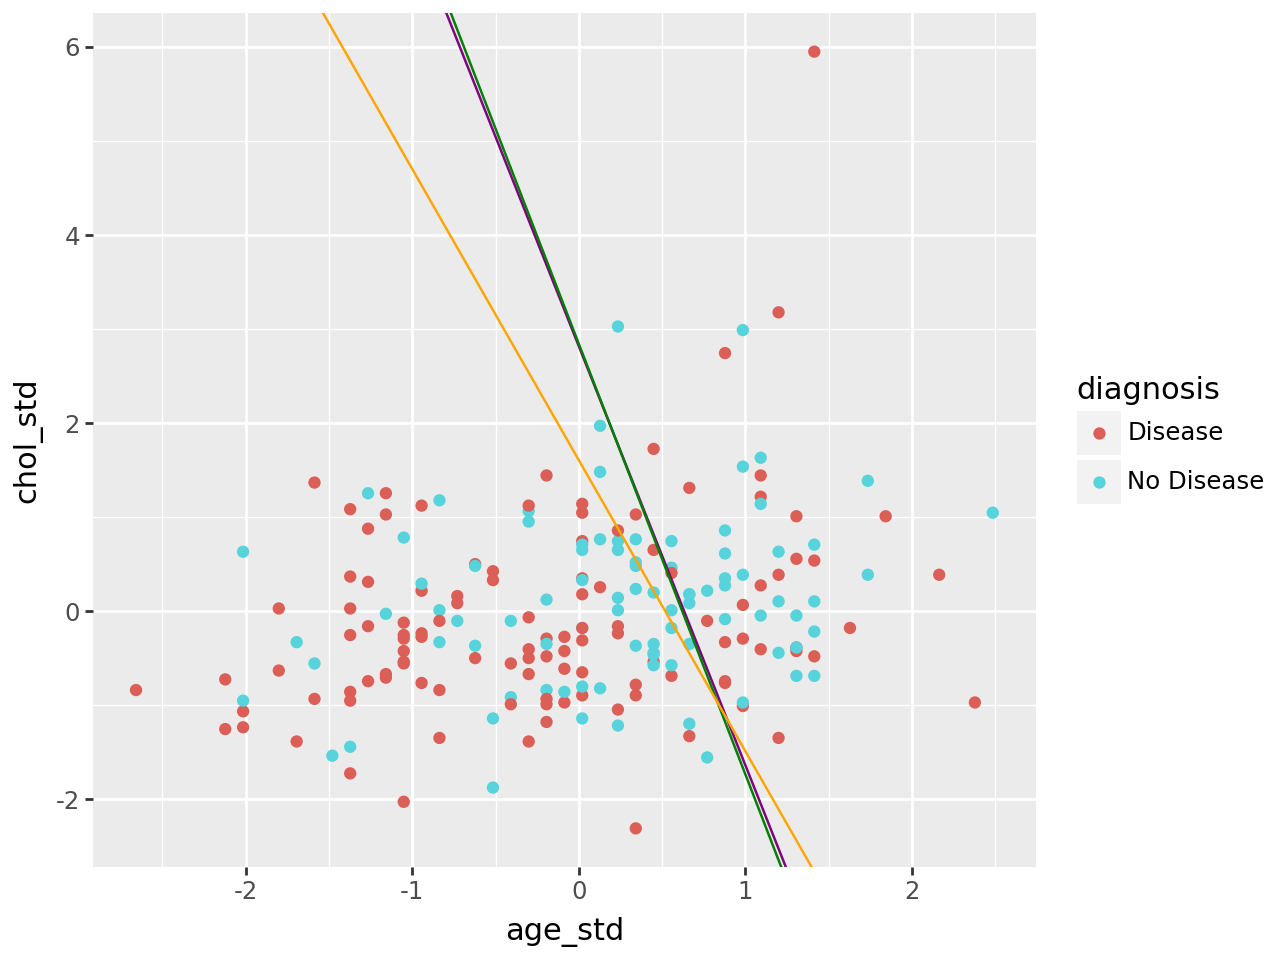

In [35]:
# Plotting
(ggplot(heart_disease, aes(x="age_std", y="chol_std", color="diagnosis"))
+ geom_point()
# Logistic Regression decision boundary
+ geom_abline(intercept = - logistic_intercept / logistic_chol_coef, slope = - logistic_age_coef / logistic_chol_coef, color = "purple")
# LDA decision boundary
+ geom_abline(intercept = - lda_intercept_plot / lda_chol_coef_plot, slope = - lda_age_coef_plot / lda_chol_coef_plot, color = "green")
# SVC decision boundary
+ geom_abline(intercept = - svc_intercept_plot / svc_chol_coef_plot, slope = - svc_age_coef_plot / svc_chol_coef_plot, color = "orange"))

All 3 models predict no disease if cholesterol is very high.

For older patients, moderate cholesterol leads to a higher predicted risk.

The logistic and LDA are similar while the SVC is slightly lower.

We are trying to predict a person's cholesterol level based on their age. When looking at the lines, we are also trying to predict the probability of heart disease.